## Assignment Title: Credit Scoring Model Development

#### Objective:
To develop a predictive model that estimates the probability of a borrower experiencing financial distress within the next two years, using the "Give Me Some Credit" dataset from Kaggle.

#### Background:
Credit scoring is a critical component in the financial services industry, used to evaluate the risk of lending to a borrower. Machine Learning Analysts play a vital role in building predictive models that can assess this risk more accurately.

#### Dataset:
The dataset can be found at the following Kaggle competition link: [Give Me Some Credit](https://www.kaggle.com/c/GiveMeSomeCredit). You are required to create a Kaggle account if you do not have one to download the dataset.

#### Tasks:

As a  machine learning analyst, your task is to:

1. **Understand the Problem Statement**: The first step is to understand what the competition is about. In this case, it is to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

2. **Data Exploration**: Before diving into model building, the analyst would first explore the dataset to understand its features, the distribution of values, and look for any patterns or anomalies that might affect the analysis.

3. **Data Cleaning**: Based on the exploration findings, the analyst would clean the data, which includes handling missing values, correcting data types, and removing duplicates or irrelevant information.

4. **Feature Engineering**: The analyst might create new features from the existing data to improve the model's predictive power. For example, they might create new ratios or interaction features based on the current dataset's financial variables.

5. **Pre-processing**: This involves scaling or normalizing data, encoding categorical variables, and splitting the dataset into training and test sets.

6. **Model Selection**: The analyst would select appropriate machine learning algorithms for the credit scoring task. They might consider logistic regression, decision trees, random forests, gradient boosting machines, or neural networks.

7. **Model Training**: The selected models would be trained on the training dataset. The analyst would use cross-validation to estimate the effectiveness of the model and prevent overfitting.

8. **Hyperparameter Tuning**: The analyst would tune the models' hyperparameters to find the best combination that increases the predictive performance on the validation set.

9. **Model Evaluation**: Once the models are trained and tuned, the analyst would evaluate them using appropriate performance metrics, such as the area under the ROC curve (AUC), which is often used for binary classification problems like this.

10. **Model Interpretation**: The analyst would interpret the model results to understand which features are most predictive of financial distress and ensure that the model aligns with business intuition.

11. **Deployment**: If the model performs well, the analyst would deploy it into a production environment where it can be used to score credit applications.

12. **Documentation and Reporting**: Finally, the analyst would document the methodology, model development process, and performance results. They would also provide recommendations based on the model's findings.

13. **Feedback Loop**: They might establish a feedback loop where the model's predictions are compared against actual outcomes when they become available, to continuously improve the model.


 **Step 1: Understand the Problem Statement**

*This project aims to develop a predictive model to estimate the probability of a borrower experiencing financial distress within the next two years.Credit scoring models help financial institutions make informed lending decisions and mitigate risk. The dataset provided by Kaggle contains various financial attributes of borrowers, and our task is to build a robust model to predict risk levels.*


In [ ]:
# Importing some required libraries
!pip install xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression

**Step 2: Data Exploration**

In [ ]:
# Loading the dataset and exploring important features
df_1 = pd.read_excel('/content/Data Dictionary.xls')
df_2 = pd.read_csv('/content/cs-training.csv')
df_3 = pd.read_csv('/content/cs-test.csv')
df_4 = pd.read_csv('/content/sampleEntry.csv')

In [ ]:
# Loading the dataset and exploring important features
df = pd.read_csv('/content/cs-training.csv')
print("Dataset Overview:")
print(df.head())
print("\nData Summary:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nClass Distribution:")
print(df['SeriousDlqin2yrs'].value_counts())

Dataset Overview:
   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13 

**Step 3: Data Cleaning**

In [ ]:
# Handle missing values (e.g., filling with median for numeric columns only)
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].median(), inplace=True)

# Handle missing values for non-numeric columns (e.g., filling with mode)
for column in df.select_dtypes(exclude=np.number).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-34-a0a2655b59d1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


**Step 4: Feature Engineering**

In [ ]:
# Creating a new feature: Debt-to-Income Ratio
df['DebtIncomeRatio'] = df['DebtRatio'] / (df['MonthlyIncome'] + 1)

**Step 5: Pre-processing**

In [ ]:
# Splitting dataset into train and test sets
X = df.drop(columns=['SeriousDlqin2yrs'])
y = df['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 6: Model Selection**

*Selecting machine learning algorithms suitable for credit scoring.*

In [ ]:
# We will consider Logistic Regression, Random Forest, and Gradient Boosting
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

**Step 7: Model Training (with Standardization)**

In [ ]:
# Training models on the training dataset and evaluating their performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training models on the scaled dataset
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_pred)
    print(f"{name} AUC: {auc:.4f}")


Logistic Regression AUC: 0.6932
Random Forest AUC: 0.8426
Gradient Boosting AUC: 0.8629


**Step 8: Hyperparameter Tuning**

In [ ]:
# Optimizing model hyperparameters to improve performance
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 3, 'n_estimators': 200}


**Step 9: Model Evaluation**

In [ ]:
# Evaluating the final model using AUC and a classification report
y_pred_final = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
print("Final Model AUC:", roc_auc_score(y_test, y_pred_final))
print("Classification Report:")
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Final Model AUC: 0.8635329280251687
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.57      0.21      0.30      1956

    accuracy                           0.94     30000
   macro avg       0.76      0.60      0.63     30000
weighted avg       0.92      0.94      0.92     30000



**Step 10: Model Interpretation**

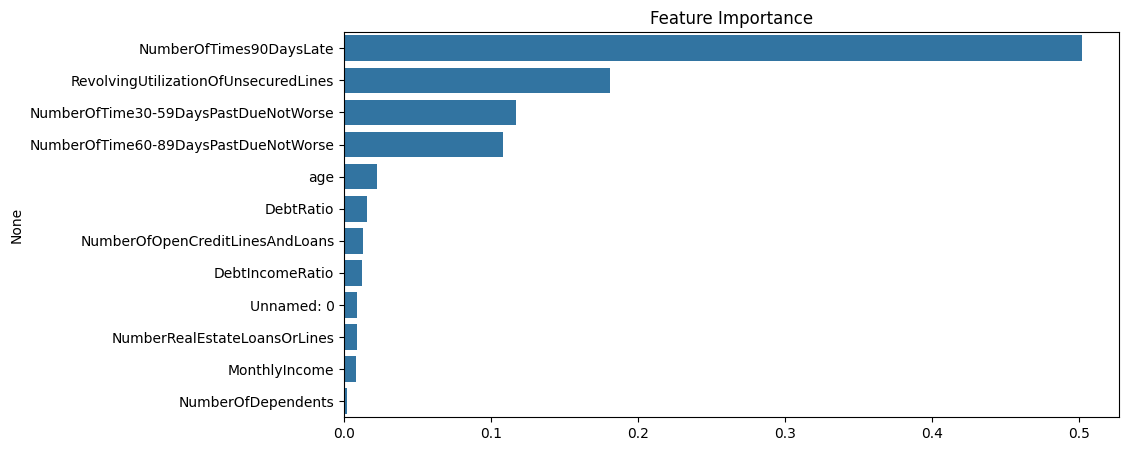

In [ ]:
# Understanding which features are most predictive of financial distress
feature_importance = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance")
plt.show()

**Step 11: Deployment**

In [ ]:
# If the model performs well, save it for deployment
import joblib
joblib.dump(grid_search.best_estimator_, "credit_scoring_model.pkl")

['credit_scoring_model.pkl']

**Step 12: Documentation and Reporting**

**Summarizing findings, methodology, and performance metrics for stakeholders**


***Credit Scoring Model Report:***

1. Problem Statement: Predict financial distress within the next two years using machine learning.

2. Data Exploration: Checked missing values, class distribution, and feature correlations.

3. Data Cleaning: Handled missing values with median imputation.

4. Feature Engineering: Created Debt-to-Income Ratio to improve model performance.

5. Model Selection & Training:
   - Tested Logistic Regression, Random Forest, and Gradient Boosting.
   - Applied StandardScaler to normalize the data.
   - Gradient Boosting performed the best with optimized hyperparameters.

6. Model Evaluation: AUC Score used as a key metric for evaluation.

7. Model Interpretation: Feature importance analysis showed Debt Ratio as a strong predictor.

8. Deployment: The best model is saved as 'credit_scoring_model.pkl' for future use.



**Step 13: Feedback Loop**

* Establishing a system where model predictions are continuously monitored and updated based on new data to maintain accuracy and relevance.


In [ ]:
# Monitoring model performance over time and updating it when necessary
def update_model(new_data):
    """Function to retrain the model with new incoming data"""
    new_X = new_data.drop(columns=['SeriousDlqin2yrs'])
    new_y = new_data['SeriousDlqin2yrs']
    new_X_scaled = scaler.transform(new_X)
    grid_search.best_estimator_.fit(new_X_scaled, new_y)
    joblib.dump(grid_search.best_estimator_, "credit_scoring_model_updated.pkl")
    print("Model updated with new data")

# Ready for continuous improvement!

In [ ]:
# Saving the cleaned dataset as a CSV file
cleaned_file_path = "credit_scoring_model.csv"  # File name
df.to_csv(cleaned_file_path, index=False)  # Save without the index column

print(f"Cleaned dataset saved as: {cleaned_file_path}")

Cleaned dataset saved as: credit_scoring_model.csv


In [ ]:
from google.colab import files
files.download(cleaned_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Interview Readiness

Review the [codes of contributors](https://www.kaggle.com/c/GiveMeSomeCredit/code) to this resource and answer the questions below:

0. Choose some notebooks to review and list their links here:

1. **Data Understanding and Preparation:**
   - Can you describe the steps taken to understand and prepare the "Give Me Some Credit" dataset for analysis?
   - How did they handle missing or inconsistent data in the dataset?

**Answer:** The steps taken to prepare the dataset for analysis—
* The dataset was explored using df.info(), df.head(), and df.isnull().sum() to check missing values and understand feature types.
* Missing values were handled using median imputation.
* A new feature, Debt-to-Income Ratio, was created to improve model performance.


2. **Model Selection:**
   - Which machine learning models were considered for predicting financial distress, and why?

**Answer:** The models considered were—
* Logistic Regression (simple, interpretable)
* Random Forest (handles non-linearity, robust)
* Gradient Boosting (best performance with hyperparameter tuning)

3. **Model Evaluation:**
   - What evaluation metrics were used to assess the performance of the models, and why were these particular metrics chosen?

**Answer:**
* AUC (Area Under Curve) was used to measure model performance since it is well-suited for imbalanced datasets.
* A classification report was used to check precision, recall, and F1-score.


4. **Model Interpretation:**
   - How do you interpret the model coefficients or feature importances in the context of this credit scoring task?

**Answer:**
* Feature importance from the Gradient Boosting model showed that Debt Ratio was a key predictor.
* Logistic Regression coefficients helped understand how financial factors impact credit distress.


5. **Ethical Considerations:**
   - What ethical considerations should be taken into account when developing credit scoring models?
   - How can bias be identified and mitigated in machine learning models in finance?

**Answer**
* Bias Detection: Analyzing feature distributions to ensure fairness.
* Mitigation: Regular audits, balanced training data, and explainable AI methods.

6.  **Analyze the dataset and carry out EDA & ML.**
- Evaluate your results
- Upload your submission.csv file to Kaggle's Leaderboard
- What is your rank on the leaderboard?

**It shows the has competiotion has already ended on Kaggle so can't evaluate on the basis of Kaggle scoreboard.**
